
# calculate the dissociation curve of HF with sto3g basis


In [1]:
import numpy as np
from pyscf import gto,scf,fci,cc,mp
mol = gto.Mole()
natoms = 2
distance = np.linspace(0.1, 4.0, 40)
n = len(distance)
energy_RHF = np.zeros(n)
energy_UHF = np.zeros(n)
energy_FCI = np.zeros(n)
energy_CCSD = np.zeros(n)
energy_UCCSD = np.zeros(n)
energy_MP2 = np.zeros(n)

## single point

In [2]:
R = 1.0
mol.atom = [['H',(0.0, 0.0, 0.0)],['F',(0.0, 0.0, R)]]
mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
mol.verbose = 5
mol.build()

molRHF = scf.RHF(mol) 
molRHF.kernel()    
dm0 = molRHF.make_rdm1()
print(dm0.shape)

# molFCI = fci.FCI(mol, molRHF.mo_coeff)
# molFCI.nroots = 2
# result = molFCI.kernel()
# print(result[0])
# print(result[1][0])

molCCSD = cc.CCSD(molRHF)
molCCSD.max_cycle = 100
e,t1,t2 = molCCSD.kernel()
print(t1.shape)
print(t2.shape)

System: uname_result(system='Linux', node='localhost.localdomain', release='3.10.0-957.el7.x86_64', version='#1 SMP Thu Nov 8 23:39:32 UTC 2018', machine='x86_64', processor='x86_64')  Threads 72
Python 3.7.0 (default, Oct  9 2018, 10:31:47) 
[GCC 7.3.0]
numpy 1.19.4  scipy 1.5.4
Date: Wed Nov 25 10:24:07 2020
PySCF version 1.7.5
PySCF path  /home/dell/.local/lib/python3.7/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 5
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 10
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.000000000000 Bohr
[INPUT]  2 F      0.000000000000   0.000000000000   1.000000000000 AA    0.000000000000   0.000000000000   1.889726124565 Bohr
[INPUT] ---------------- BASIS SET ---------------- 
[INPUT] l, kappa, [nprim/nctr], expnt,        

## calculate RHF MP2 CCSD FCI

In [3]:
#  calculate RHF MP2 CCSD FCI

for i,R in enumerate(distance):
    mol.atom = [['H',(0.0, 0.0, 0.0)],['F',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()
    
    molRHF = scf.RHF(mol) 
    energy_RHF[i] = molRHF.kernel(dm0=dm0)
    dm0 = molRHF.make_rdm1()
  
    molFCI = fci.FCI(mol, molRHF.mo_coeff)
    energy_FCI[i] = molFCI.kernel()[0]
    
    molMP2 = mp.MP2(molRHF)
    energy_MP2[i] = molMP2.kernel()[0] + energy_RHF[i]
    
    molCCSD = cc.CCSD(molRHF)
    energy_CCSD[i] = molCCSD.kernel()[0] + energy_RHF[i]
        




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpps481pkp
max_memory 4000 MB (current use 149 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -162.60675549900768  E_coul = 44.61548000940411
init E= -70.3653265068036
cond(S) = 53.321124930055824
    CPU time for initialize scf      2.62 sec, wall time      0.04 sec
  HOMO = -1.0818423541161  LUMO = 1.02887288114559
  mo_energy =
[-30.15483337  -2.36815861  -1.3257335   -1.3257335   -1.08184235
   1.02887288]
E1 = -166.47113110664552  E_coul = 49.28545377876495
cycle= 1 E= -69.5597283450806  delta_E= 0.806  |g|= 0.0985  |ddm|= 1.53
    CPU time for cycle= 1      0.63 sec, wall time      0.01 sec
  HOMO = -0.85948319949641  

cycle = 2  E_corr(CCSD) = -0.000720898115084879  dE = -4.00104216e-06  norm(t1,t2) = 0.000154259
    CPU time for CCSD iter      2.02 sec, wall time      0.03 sec
cycle = 3  E_corr(CCSD) = -0.000721664290538993  dE = -7.66175454e-07  norm(t1,t2) = 2.71409e-05
    CPU time for CCSD iter      1.24 sec, wall time      0.02 sec
cycle = 4  E_corr(CCSD) = -0.000721661178666339  dE = 3.11187265e-09  norm(t1,t2) = 3.18742e-07
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
    CPU time for CCSD      9.31 sec, wall time      0.15 sec
CCSD converged
E(CCSD) = -88.79560917513412  E_corr = -0.0007216611786663387


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp2x8ba7oe


CCSD nocc = 5, nmo = 6
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 159 MB)
E1 = -157.50766076424947  E_coul = 48.92348656207645
    CPU time for CCSD integral transformation     12.52 sec, wall time      0.18 sec
Init t2, MP2 energy = -96.6805882914842  E_corr(MP2) -0.00290133501115601
    CPU time for init mp2      0.05 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.00290133501115637
cycle = 1  E_corr(CCSD) = -0.00331379210564697  dE = -0.000412457094  norm(t1,t2) = 0.00370326
    CPU time for CCSD iter      4.21 sec, wall time      0.06 sec
cycle = 2  E_corr(CCSD) = -0.00338918456820541  dE = -7.53924626e-05  norm(t1,t2) = 0.000802769
    CPU time for CCSD iter      3.18 sec, wall time      0.05 sec
cycle = 3  E_corr(CCSD) = -0.00340997232405586  dE = -2.07877559e-05  norm(t1,t2) = 0.000202532
    CPU time for CCSD iter      4.29 sec, wall time      0.07 sec
c

E1 = -153.81393167352547  E_coul = 47.682500665913665
cycle= 5 E= -98.1937728438118  delta_E= -1.32e-11  |g|= 2.77e-08  |ddm|= 1.53e-05
    CPU time for cycle= 5      0.67 sec, wall time      0.01 sec
  HOMO = -0.500452098250056  LUMO = 0.98897273116829
  mo_energy =
[-25.90546936  -1.65031576  -0.66777585  -0.5004521   -0.5004521
   0.98897273]
E1 = -153.81393172427627  E_coul = 47.68250071666449
Extra cycle  E= -98.1937728438118  delta_E= 2.84e-14  |g|= 5.26e-09  |ddm|= 4.68e-08
    CPU time for scf_cycle      4.70 sec, wall time      0.07 sec
    CPU time for SCF      4.75 sec, wall time      0.08 sec
converged SCF energy = -98.1937728438118

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 5, nmo = 6
max_memory 4000 MB (current use 160 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.23 sec, wall time      0.00 sec
E(MP2) = -98.2007797736411  E_corr = -0.0070069298293561

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 6
ma

    CPU time for cycle= 1      2.05 sec, wall time      0.03 sec
  HOMO = -0.470167336821703  LUMO = 0.759497795871869
  mo_energy =
[-25.89082428  -1.51733726  -0.61790077  -0.47016734  -0.47016734
   0.7594978 ]
E1 = -151.0305438559798  E_coul = 46.54768750114053
cycle= 2 E= -98.5296127319893  delta_E= -3.2e-06  |g|= 0.000713  |ddm|= 0.00477
    CPU time for cycle= 2      2.12 sec, wall time      0.03 sec
  HOMO = -0.470456493495128  LUMO = 0.759548315760526
  mo_energy =
[-25.89128337  -1.51756289  -0.61793514  -0.47045649  -0.47045649
   0.75954832]
E1 = -151.03005005446386  E_coul = 46.54719353224039
cycle= 3 E= -98.5296128993735  delta_E= -1.67e-07  |g|= 0.000114  |ddm|= 0.00121
    CPU time for cycle= 3      1.85 sec, wall time      0.03 sec
  HOMO = -0.470499132649124  LUMO = 0.759560871586744
  mo_energy =
[-25.89134964  -1.51759717  -0.61793361  -0.47049913  -0.47049913
   0.75956087]
E1 = -151.02997145529213  E_coul = 46.54711492841186
cycle= 4 E= -98.5296129040303  delta_E=



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp8zi5hdt5
max_memory 4000 MB (current use 162 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -148.9162100249543  E_coul = 45.62136004007646
init E= -98.5322550865978
cond(S) = 3.320692233574954
    CPU time for initialize scf      4.27 sec, wall time      0.06 sec
  HOMO = -0.465637584096697  LUMO = 0.521581140118711
  mo_energy =
[-25.90118087  -1.44911262  -0.57425402  -0.46563758  -0.46563758
   0.52158114]
E1 = -148.96029976894255  E_coul = 45.627232699751644
cycle= 1 E= -98.5704721709109  delta_E= -0.0382  |g|= 0.00708  |ddm|= 0.102
    CPU time for cycle= 1      0.44 sec, wall time      0.01 sec
  HOMO = -0.4647846006

max_memory 4000 MB (current use 162 MB)
E1 = -148.16566109289474  E_coul = 45.28383891890758
    CPU time for CCSD integral transformation      5.66 sec, wall time      0.08 sec
Init t2, MP2 energy = -98.5789077728881  E_corr(MP2) -0.026717324610013
    CPU time for init mp2      0.06 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.026717324610013
cycle = 1  E_corr(CCSD) = -0.0363172673477979  dE = -0.00959994274  norm(t1,t2) = 0.0433865
    CPU time for CCSD iter      0.96 sec, wall time      0.02 sec
cycle = 2  E_corr(CCSD) = -0.0401812969246341  dE = -0.00386402958  norm(t1,t2) = 0.0185278
    CPU time for CCSD iter      2.36 sec, wall time      0.04 sec
cycle = 3  E_corr(CCSD) = -0.0429654103925336  dE = -0.00278411347  norm(t1,t2) = 0.00796562
    CPU time for CCSD iter      2.61 sec, wall time      0.04 sec
cycle = 4  E_corr(CCSD) = -0.0429223120961932  dE = 4.30982963e-05  norm(t1,t2) = 0.000363654
    CPU time for CCSD iter      1.06 sec, wall time      0.02 sec
cycle = 5  

  HOMO = -0.464029733031468  LUMO = 0.326251469978193
  mo_energy =
[-25.92936422  -1.4099034   -0.46642126  -0.46402973  -0.46402973
   0.32625147]
E1 = -146.83632094264283  E_coul = 44.68415545961257
cycle= 3 E= -98.4886309458918  delta_E= -2.85e-07  |g|= 0.000101  |ddm|= 0.00111
    CPU time for cycle= 3      0.35 sec, wall time      0.00 sec
  HOMO = -0.464084248442877  LUMO = 0.326234672184605
  mo_energy =
[-25.92947224  -1.40993954  -0.4664625   -0.46408425  -0.46408425
   0.32623467]
E1 = -146.83634343683903  E_coul = 44.684177950038034
cycle= 4 E= -98.4886309496625  delta_E= -3.77e-09  |g|= 9.31e-06  |ddm|= 0.00013
    CPU time for cycle= 4      1.99 sec, wall time      0.03 sec
  HOMO = -0.464074702292759  LUMO = 0.32623402025715
  mo_energy =
[-25.92945667  -1.40993051  -0.46646307  -0.4640747   -0.4640747
   0.32623402]
E1 = -146.83633165587992  E_coul = 44.68416616905104
cycle= 5 E= -98.4886309496904  delta_E= -2.79e-11  |g|= 1.49e-09  |ddm|= 1.1e-05
    CPU time for cycle

    CPU time for CCSD iter      1.06 sec, wall time      0.02 sec
cycle = 6  E_corr(CCSD) = -0.0860754522222704  dE = 4.86044592e-05  norm(t1,t2) = 0.000127767
    CPU time for CCSD iter      2.46 sec, wall time      0.04 sec
cycle = 7  E_corr(CCSD) = -0.0860666393243862  dE = 8.81289788e-06  norm(t1,t2) = 8.19679e-06
    CPU time for CCSD iter      4.40 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.0860727856322964  dE = -6.14630791e-06  norm(t1,t2) = 1.50685e-05
    CPU time for CCSD iter      4.41 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.086072768893911  dE = 1.67383854e-08  norm(t1,t2) = 3.98535e-08
    CPU time for CCSD iter      4.43 sec, wall time      0.07 sec
    CPU time for CCSD     31.43 sec, wall time      0.49 sec
CCSD converged
E(CCSD) = -98.53799935170152  E_corr = -0.08607276889391097


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDII

E1 = -145.4127683354989  E_coul = 44.05781900748928
cycle= 5 E= -98.3783275165846  delta_E= -1.42e-14  |g|= 2.51e-10  |ddm|= 3.06e-07
    CPU time for cycle= 5      1.96 sec, wall time      0.03 sec
  HOMO = -0.383729889619175  LUMO = 0.192009973272311
  mo_energy =
[-25.93418733  -1.39819274  -0.4662276   -0.4662276   -0.38372989
   0.19200997]
E1 = -145.4127683341829  E_coul = 44.05781900617322
Extra cycle  E= -98.3783275165847  delta_E= -8.53e-14  |g|= 5.97e-11  |ddm|= 3.72e-10
    CPU time for scf_cycle     14.43 sec, wall time      0.21 sec
    CPU time for SCF     14.61 sec, wall time      0.22 sec
converged SCF energy = -98.3783275165847

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 5, nmo = 6
max_memory 4000 MB (current use 164 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      1.78 sec, wall time      0.03 sec
E(MP2) = -98.4475064433668  E_corr = -0.0691789267821544

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 6
ma

    CPU time for CCSD iter      4.42 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -0.146277980961265  dE = 1.11282705e-10  norm(t1,t2) = 1.02314e-09
    CPU time for CCSD iter      4.37 sec, wall time      0.07 sec
    CPU time for CCSD     38.66 sec, wall time      0.60 sec
CCSD converged
E(CCSD) = -98.48986955224659  E_corr = -0.1462779809612648


******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpjiv0_vi5
max_memory 4000 MB (current use 164 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -144.56402315203405  E_coul = 43.620673854178946
init E= -98.2974632432551
cond(S) = 1.6879425079670485
    CPU time for initializ

  HOMO = -0.317195094020025  LUMO = 0.109262510677842
  mo_energy =
[-25.92693599  -1.39163059  -0.46423399  -0.46423399  -0.31719509
   0.10926251]
E1 = -144.44812962283248  E_coul = 43.659835150089314
Extra cycle  E= -98.2816655789116  delta_E= 7.11e-14  |g|= 8.19e-11  |ddm|= 3.8e-10
    CPU time for scf_cycle     11.03 sec, wall time      0.16 sec
    CPU time for SCF     11.09 sec, wall time      0.17 sec
converged SCF energy = -98.2816655789116

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 5, nmo = 6
max_memory 4000 MB (current use 165 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.48 sec, wall time      0.01 sec
E(MP2) = -98.3908613456879  E_corr = -0.109195766776323

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 6
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 165 MB)
E1 = -144.44812962283248  E_c

chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpb0vrxf50
max_memory 4000 MB (current use 166 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -143.85841152771195  E_coul = 43.36606283706331
init E= -98.2244463581344
cond(S) = 1.6411048805520936
    CPU time for initialize scf      6.57 sec, wall time      0.09 sec
  HOMO = -0.288987953073616  LUMO = 0.0638876830478045
  mo_energy =
[-25.93455872  -1.39804918  -0.47253053  -0.47253053  -0.28898795
   0.06388768]
E1 = -143.97958683765978  E_coul = 43.480238160079836
cycle= 1 E= -98.2314463450657  delta_E= -0.007  |g|= 0.00158  |ddm|= 0.0292
    CPU time for cycle= 1      1.77 sec, wall time      0.03 sec
  HOMO = -0.282610398071571  LUMO = 0.0728173946917549
  mo_energy =
[-25.91847493  -1.38706475  -0.46070296  -0.46070296  -0.2826104
   0.07281739]
E1 = -143.96536518507895  E_coul = 43.46601614893923
cycle= 2 E= -98.2314467036254  delta_E= -3.59e-07  |g|= 0.000955  |ddm|= 0.00379
    CPU time for cycle= 2      1.76 sec, 

Init t2, MP2 energy = -98.37043837927  E_corr(MP2) -0.15981999207222
    CPU time for init mp2      0.11 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.15981999207222
cycle = 1  E_corr(CCSD) = -0.231588067358851  dE = -0.0717680753  norm(t1,t2) = 0.248435
    CPU time for CCSD iter      2.20 sec, wall time      0.04 sec
cycle = 2  E_corr(CCSD) = -0.248845990292698  dE = -0.0172579229  norm(t1,t2) = 0.0700238
    CPU time for CCSD iter      0.77 sec, wall time      0.02 sec
cycle = 3  E_corr(CCSD) = -0.247140769088437  dE = 0.0017052212  norm(t1,t2) = 0.0474343
    CPU time for CCSD iter      2.75 sec, wall time      0.04 sec
cycle = 4  E_corr(CCSD) = -0.248380544096229  dE = -0.00123977501  norm(t1,t2) = 0.0125635
    CPU time for CCSD iter      4.31 sec, wall time      0.07 sec
cycle = 5  E_corr(CCSD) = -0.248439869407514  dE = -5.93253113e-05  norm(t1,t2) = 0.000263283
    CPU time for CCSD iter      4.24 sec, wall time      0.06 sec
cycle = 6  E_corr(CCSD) = -0.248428765778719 

    CPU time for cycle= 2      0.64 sec, wall time      0.01 sec
  HOMO = -0.24388331915897  LUMO = 0.0357692593976731
  mo_energy =
[-25.9090797   -1.38260247  -0.45684238  -0.45684238  -0.24388332
   0.03576926]
E1 = -143.42453120578114  E_coul = 43.26368754647373
cycle= 3 E= -98.1764291183574  delta_E= -9.5e-06  |g|= 0.000144  |ddm|= 0.00749
    CPU time for cycle= 3      0.67 sec, wall time      0.01 sec
  HOMO = -0.243859584522388  LUMO = 0.0357805822641634
  mo_energy =
[-25.90897205  -1.3825465   -0.45677671  -0.45677671  -0.24385958
   0.03578058]
E1 = -143.42383486789686  E_coul = 43.26299119803187
cycle= 4 E= -98.176429128915  delta_E= -1.06e-08  |g|= 3.04e-06  |ddm|= 0.000225
    CPU time for cycle= 4      0.65 sec, wall time      0.01 sec
  HOMO = -0.243858842838687  LUMO = 0.0357806587465253
  mo_energy =
[-25.90897078  -1.38254592  -0.45677596  -0.45677596  -0.24385884
   0.03578066]
E1 = -143.4238323557183  E_coul = 43.26298868584928
cycle= 5 E= -98.176429128919  delta_E

cycle = 5  E_corr(CCSD) = -0.292506309235196  dE = -0.00126639566  norm(t1,t2) = 0.00426352
    CPU time for CCSD iter      1.07 sec, wall time      0.02 sec
cycle = 6  E_corr(CCSD) = -0.29232442219849  dE = 0.000181887037  norm(t1,t2) = 0.000698383
    CPU time for CCSD iter      2.80 sec, wall time      0.04 sec
cycle = 7  E_corr(CCSD) = -0.292309678987488  dE = 1.4743211e-05  norm(t1,t2) = 2.20214e-05
    CPU time for CCSD iter      4.43 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.292327332617175  dE = -1.76536297e-05  norm(t1,t2) = 6.82847e-05
    CPU time for CCSD iter      4.25 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.292327189079091  dE = 1.43538084e-07  norm(t1,t2) = 5.77811e-07
    CPU time for CCSD iter      4.42 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -0.292327186289116  dE = 2.78997553e-09  norm(t1,t2) = 3.7786e-08
    CPU time for CCSD iter      4.44 sec, wall time      0.07 sec
 

    CPU time for cycle= 3      0.47 sec, wall time      0.01 sec
  HOMO = -0.217045603998776  LUMO = 0.0119263032858627
  mo_energy =
[-2.59006121e+01 -1.37848092e+00 -4.52785136e-01 -4.52785136e-01
 -2.17045604e-01  1.19263033e-02]
E1 = -143.00443525276597  E_coul = 43.10051508762914
cycle= 4 E= -98.1399961287368  delta_E= -4.98e-09  |g|= 1.44e-06  |ddm|= 0.00015
    CPU time for cycle= 4      0.42 sec, wall time      0.01 sec
  HOMO = -0.217045119284518  LUMO = 0.0119261298659766
  mo_energy =
[-2.59006112e+01 -1.37848041e+00 -4.52784554e-01 -4.52784554e-01
 -2.17045119e-01  1.19261299e-02]
E1 = -143.00442853310977  E_coul = 43.10050836797195
cycle= 5 E= -98.1399961287378  delta_E= -9.95e-13  |g|= 8.95e-09  |ddm|= 2.25e-06
    CPU time for cycle= 5      0.66 sec, wall time      0.01 sec
  HOMO = -0.217045128053944  LUMO = 0.0119261363202539
  mo_energy =
[-2.59006112e+01 -1.37848042e+00 -4.52784568e-01 -4.52784568e-01
 -2.17045128e-01  1.19261363e-02]
E1 = -143.00442877356315  E_coul

cycle = 5  E_corr(CCSD) = -0.316980030045608  dE = -0.000547722392  norm(t1,t2) = 0.0296997
    CPU time for CCSD iter      4.28 sec, wall time      0.07 sec
cycle = 6  E_corr(CCSD) = -0.32389987377428  dE = -0.00691984373  norm(t1,t2) = 0.027117
    CPU time for CCSD iter      2.66 sec, wall time      0.04 sec
cycle = 7  E_corr(CCSD) = -0.321806208091147  dE = 0.00209366568  norm(t1,t2) = 0.00567644
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.32271120031138  dE = -0.00090499222  norm(t1,t2) = 0.00433535
    CPU time for CCSD iter      4.35 sec, wall time      0.06 sec
cycle = 9  E_corr(CCSD) = -0.322714904990348  dE = -3.70467897e-06  norm(t1,t2) = 1.74482e-05
    CPU time for CCSD iter      4.45 sec, wall time      0.07 sec
cycle = 10  E_corr(CCSD) = -0.322714772154607  dE = 1.32835741e-07  norm(t1,t2) = 6.72355e-07
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
cycle = 11  E_corr(CCSD) = -0.322714791008954  dE = -

  HOMO = -0.198526390445764  LUMO = -0.00419162438726315
  mo_energy =
[-2.58950879e+01 -1.37566743e+00 -4.49947067e-01 -4.49947067e-01
 -1.98526390e-01 -4.19162439e-03]
E1 = -142.66930886552356  E_coul = 42.965737332095195
cycle= 3 E= -98.1160399006684  delta_E= -1.91e-05  |g|= 7.05e-05  |ddm|= 0.0104
    CPU time for cycle= 3      1.98 sec, wall time      0.03 sec
  HOMO = -0.198519475799163  LUMO = -0.00418747463678758
  mo_energy =
[-2.58950571e+01 -1.37565055e+00 -4.49927631e-01 -4.49927631e-01
 -1.98519476e-01 -4.18747464e-03]
E1 = -142.66898706945437  E_coul = 42.965415533602396
cycle= 4 E= -98.116039903092  delta_E= -2.42e-09  |g|= 7.88e-07  |ddm|= 0.000105
    CPU time for cycle= 4      1.96 sec, wall time      0.03 sec
  HOMO = -0.198519224551747  LUMO = -0.00418760782841453
  mo_energy =
[-2.58950566e+01 -1.37565026e+00 -4.49927317e-01 -4.49927317e-01
 -1.98519225e-01 -4.18760783e-03]
E1 = -142.66898156991834  E_coul = 42.96541003406598
cycle= 5 E= -98.1160399030924  delta_E

cycle = 2  E_corr(CCSD) = -0.274118650586129  dE = 0.0343381683  norm(t1,t2) = 0.717355
    CPU time for CCSD iter      1.61 sec, wall time      0.03 sec
cycle = 3  E_corr(CCSD) = -0.28916740069975  dE = -0.0150487501  norm(t1,t2) = 1.90784
    CPU time for CCSD iter      2.61 sec, wall time      0.04 sec
cycle = 4  E_corr(CCSD) = -0.320359137519711  dE = -0.0311917368  norm(t1,t2) = 0.289553
    CPU time for CCSD iter      4.33 sec, wall time      0.07 sec
cycle = 5  E_corr(CCSD) = -0.330856975961381  dE = -0.0104978384  norm(t1,t2) = 0.122966
    CPU time for CCSD iter      2.07 sec, wall time      0.03 sec
cycle = 6  E_corr(CCSD) = -0.350474460835176  dE = -0.0196174849  norm(t1,t2) = 0.0671801
    CPU time for CCSD iter      1.40 sec, wall time      0.03 sec
cycle = 7  E_corr(CCSD) = -0.344233670522152  dE = 0.00624079031  norm(t1,t2) = 0.0407315
    CPU time for CCSD iter      4.49 sec, wall time      0.07 sec
cycle = 8  E_corr(CCSD) = -0.343179262039646  dE = 0.00105440848  norm(

diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmpgl6pzno9
max_memory 4000 MB (current use 168 MB)
Set gradient conv threshold to 3.16228e-05
E1 = -142.3802435108041  E_coul = 42.83732406358981
init E= -98.0997088719779
cond(S) = 1.624670176265901
    CPU time for initialize scf      4.05 sec, wall time      0.06 sec
  HOMO = -0.186050938464545  LUMO = -0.0162776298333844
  mo_energy =
[-2.58934497e+01 -1.37494685e+00 -4.49270167e-01 -4.49270167e-01
 -1.86050938e-01 -1.62776298e-02]
E1 = -142.4013044263975  E_coul = 42.85800599343814
cycle= 1 E= -98.100087857723  delta_E= -0.000379  |g|= 0.0011  |ddm|= 0.00363
    CPU time for cycle= 1      0.47 sec, wall time      0.01 sec
  HOMO = -0.185393308877437  LUMO = -0.0155468594825262
  mo_energy =
[-2.58902140e+01 -1.37289348e+00 -4.47073559e-01 -4.47073559e-01
 -1.85393309e-01 -1.55468595e-02]
E1 = -142.361147

    CPU time for cycle= 5      0.44 sec, wall time      0.01 sec
  HOMO = -0.182033782787354  LUMO = -0.0186784024699264
  mo_energy =
[-2.58910747e+01 -1.37340532e+00 -4.47656111e-01 -4.47656111e-01
 -1.82033783e-01 -1.86784025e-02]
E1 = -142.30987644413995  E_coul = 42.813112279789166
Extra cycle  E= -98.0960009589743  delta_E= -2.84e-14  |g|= 7.18e-09  |ddm|= 1.79e-08
    CPU time for scf_cycle     13.38 sec, wall time      0.19 sec
    CPU time for SCF     13.42 sec, wall time      0.20 sec
converged SCF energy = -98.0960009589743

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 5, nmo = 6
max_memory 4000 MB (current use 168 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      1.18 sec, wall time      0.02 sec
E(MP2) = -98.5038808306421  E_corr = -0.407879871667837

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 6
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_en

    CPU time for CCSD iter      2.07 sec, wall time      0.04 sec
cycle = 6  E_corr(CCSD) = -0.327964897446795  dE = -0.00609597921  norm(t1,t2) = 0.235597
    CPU time for CCSD iter      2.06 sec, wall time      0.03 sec
cycle = 7  E_corr(CCSD) = -0.367268910905239  dE = -0.0393040135  norm(t1,t2) = 0.200472
    CPU time for CCSD iter      4.38 sec, wall time      0.06 sec
cycle = 8  E_corr(CCSD) = -0.359153392663152  dE = 0.00811551824  norm(t1,t2) = 0.0425369
    CPU time for CCSD iter      4.41 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.360568243878092  dE = -0.00141485121  norm(t1,t2) = 0.0101128
    CPU time for CCSD iter      4.40 sec, wall time      0.07 sec
cycle = 10  E_corr(CCSD) = -0.360719365142799  dE = -0.000151121265  norm(t1,t2) = 0.00100847
    CPU time for CCSD iter      4.33 sec, wall time      0.06 sec
cycle = 11  E_corr(CCSD) = -0.360722154495556  dE = -2.78935276e-06  norm(t1,t2) = 2.61349e-05
    CPU time for CCSD iter      4.38 sec, wall time    

Set gradient conv threshold to 3.16228e-05
E1 = -142.08528085576052  E_coul = 42.71192635111909
init E= -98.0861666942955
cond(S) = 1.6246396331466217
    CPU time for initialize scf      1.23 sec, wall time      0.02 sec
  HOMO = -0.173682892450019  LUMO = -0.0266248936897981
  mo_energy =
[-25.89016444  -1.37279272  -0.44706749  -0.44706749  -0.17368289
  -0.02662489]
E1 = -142.08996379454865  E_coul = 42.71648740258854
cycle= 1 E= -98.0862885816142  delta_E= -0.000122  |g|= 0.000203  |ddm|= 0.00113
    CPU time for cycle= 1      0.43 sec, wall time      0.01 sec
  HOMO = -0.17348653484664  LUMO = -0.0263931486867977
  mo_energy =
[-25.88948239  -1.37234443  -0.44659059  -0.44659059  -0.17348653
  -0.02639315]
E1 = -142.08340858767542  E_coul = 42.70993241155284
cycle= 2 E= -98.0862883657766  delta_E= 2.16e-07  |g|= 0.000594  |ddm|= 0.00142
    CPU time for cycle= 2      0.36 sec, wall time      0.00 sec
  HOMO = -0.173503213127649  LUMO = -0.0264003269721722
  mo_energy =
[-25.88972

  HOMO = -0.171144904537404  LUMO = -0.0285699789514905
  mo_energy =
[-25.88942415  -1.37225761  -0.44651865  -0.44651865  -0.1711449
  -0.02856998]
E1 = -142.0223059390809  E_coul = 42.685289011322126
Extra cycle  E= -98.083702480843  delta_E= 4.26e-14  |g|= 3.04e-10  |ddm|= 7.14e-10
    CPU time for scf_cycle      4.76 sec, wall time      0.07 sec
    CPU time for SCF      4.80 sec, wall time      0.08 sec
converged SCF energy = -98.083702480843

******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 5, nmo = 6
max_memory 4000 MB (current use 168 MB)
transform (ia|jb) incore
    CPU time for Integral transformation      0.71 sec, wall time      0.01 sec
E(MP2) = -98.5721562180155  E_corr = -0.488453737172491

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 6
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 168 MB)
E1 = -142.0223059390809  E_cou

cycle = 8  E_corr(CCSD) = -0.374201216571094  dE = -0.047822569  norm(t1,t2) = 0.311106
    CPU time for CCSD iter      4.39 sec, wall time      0.07 sec
cycle = 9  E_corr(CCSD) = -0.369433866837117  dE = 0.00476734973  norm(t1,t2) = 0.0195662
    CPU time for CCSD iter      4.38 sec, wall time      0.07 sec
cycle = 10  E_corr(CCSD) = -0.372340835970541  dE = -0.00290696913  norm(t1,t2) = 0.0167615
    CPU time for CCSD iter      4.42 sec, wall time      0.07 sec
cycle = 11  E_corr(CCSD) = -0.371684166607022  dE = 0.000656669364  norm(t1,t2) = 0.00466545
    CPU time for CCSD iter      4.45 sec, wall time      0.07 sec
cycle = 12  E_corr(CCSD) = -0.371706770097661  dE = -2.26034906e-05  norm(t1,t2) = 0.000304009
    CPU time for CCSD iter      4.41 sec, wall time      0.07 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -0.371725518080317  dE = -1.87479827e-05  norm(t1,t2) = 0.000138309
    CPU time for CCSD iter      4.74 sec, wall time      0.07 sec
Line

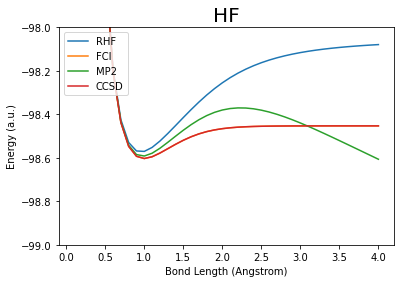

In [4]:
# plot RHF MP2 CCSD FCI
import matplotlib.pyplot as plt
plt.title("HF", fontsize=20)
plt.xlabel("Bond Length (Angstrom)")
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_RHF, label = 'RHF')
plt.plot(distance, energy_FCI, label = 'FCI')
plt.plot(distance, energy_MP2, label = 'MP2')
plt.plot(distance, energy_CCSD, label = 'CCSD')
plt.legend(loc = 2)
plt.ylim(-99, -98)
#plt.xlim(0.0, 4.5)
plt.show()

## calculate UHF UCCSD

In [5]:
for i,R in enumerate(distance):
    mol.atom = [['H',(0.0, 0.0, 0.0)],['F',(0.0, 0.0, R)]]
    mol.basis = 'sto3g' #cc-pvdz' #6-31g'#sto-3g'#cc-pvdz' #'dzp' #6-31g'#sto-3g' #6-31g'
    mol.build()
    
    print(mol.spheric_labels())
    nb = mol.nao_nr()
    print("nb=", nb)
    dm = np.zeros((2,nb,nb)) 
    dm[0,0,0] = 1
    dm[:,1,1] = 1 # 1s^2
    dm[:,2,2] = 1 # 2s^2
    dm[:,3,3] = 1 # 2px alpha
    dm[:,4,4] = 1
    dm[1,5,5] = 1
#    molUHF.conv_tol = 1e-6
#    molUHF.level_shift = 0.2
#    molUHF.diis_space = 12
#    molUHF.diis_start_cycle = 2
    molUHF = scf.UHF(mol) 
    energy_UHF[i] = molUHF.kernel(dm0=dm)
    print("R=",R)
    assert molUHF.converged == True
    
    molUCCSD = cc.UCCSD(molUHF)
    energy_UCCSD[i] = molUCCSD.kernel()[0] + energy_UHF[i] 


['0 H 1s    ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb= 6


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp_5sbhyv8
max_memory 4000 MB (current use 186 MB)
number electrons alpha = 5  beta = 5
Set gradient conv threshold to 3.16228e-05
E1 = -171.65588022086757  Ecoul = 47.58550490712284
init E= -76.4444263309447
cond(S) = 53.321124930055824
    CPU time for initialize scf      6.29 sec, wall time      0.09 sec
  alpha nocc = 5  HOMO = -0.252171428288458  LUMO = 1.21502125052982
  beta  nocc = 5  HOMO = -0.895003935442109  LUMO = 1.24745987690962
  alpha mo_energy =
[-29.80518613  -2.34437068  -1.00677783  -1.00677783  -0.25217143
   1.2150212

  beta  nocc = 5  HOMO = -0.765767994709254  LUMO = 0.954182864392408
  alpha mo_energy =
[-27.31707563  -1.89662132  -0.88582546  -0.76566312  -0.76566312
   0.95419282]
  beta  mo_energy =
[-27.31714918  -1.89717813  -0.88573885  -0.76576799  -0.76576799
   0.95418286]
multiplicity <S^2> = 1.5239177e-06  2S+1 = 1.000003
E1 = -161.95452197173125  Ecoul = 49.34666154177546
cycle= 3 E= -88.7948859385558  delta_E= -8.03e-05  |g|= 0.00157  |ddm|= 0.0447
    CPU time for cycle= 3      2.97 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.765535830552702  LUMO = 0.954143878379076
  beta  nocc = 5  HOMO = -0.765523555880435  LUMO = 0.954155174143199
  alpha mo_energy =
[-27.31666528  -1.89683271  -0.8855663   -0.76553583  -0.76553583
   0.95414388]
  beta  mo_energy =
[-27.31666685  -1.89683114  -0.8855579   -0.76552356  -0.76552356
   0.95415517]
multiplicity <S^2> = 1.0829802e-08  2S+1 = 1
E1 = -161.95488626386498  Ecoul = 49.347024268628594
cycle= 4 E= -88.7948875038364  delta_E= 

  beta  mo_energy =
[-26.45795079  -1.90875328  -0.7958068   -0.65714305  -0.65714305
   0.92086236]
multiplicity <S^2> = 3.1974423e-14  2S+1 = 1
E1 = -159.59269352636818  Ecoul = 49.319550325243405
cycle= 6 E= -94.3978268735248  delta_E= -2.21e-10  |g|= 6.42e-07  |ddm|= 7.68e-05
    CPU time for cycle= 6      3.01 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.657142959117925  LUMO = 0.920862422911341
  beta  nocc = 5  HOMO = -0.657142977037649  LUMO = 0.920862414898313
  alpha mo_energy =
[-26.45795072  -1.90875297  -0.79580678  -0.65714296  -0.65714296
   0.92086242]
  beta  mo_energy =
[-26.45795073  -1.90875302  -0.79580678  -0.65714298  -0.65714298
   0.92086241]
multiplicity <S^2> = 2.6645353e-15  2S+1 = 1
E1 = -159.5926934420853  Ecoul = 49.3195502409602
Extra cycle  E= -94.3978268735251  delta_E= -3.27e-13  |g|= 1.65e-07  |ddm|= 2.06e-06
    CPU time for scf_cycle     11.75 sec, wall time      0.17 sec
    CPU time for SCF     11.79 sec, wall time      0.18 sec
conve

    CPU time for CCSD iter      6.56 sec, wall time      0.11 sec
cycle = 3  E_corr(CCSD) = -0.0034101106153245  dE = -2.0926101e-05  norm(t1,t2) = 0.00025477
    CPU time for CCSD iter      4.62 sec, wall time      0.08 sec
cycle = 4  E_corr(CCSD) = -0.0034096233297477  dE = 4.87285577e-07  norm(t1,t2) = 1.81556e-05
    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
cycle = 5  E_corr(CCSD) = -0.00340964580397177  dE = -2.24742241e-08  norm(t1,t2) = 1.10002e-06
    CPU time for CCSD iter      3.07 sec, wall time      0.06 sec
cycle = 6  E_corr(CCSD) = -0.00340964718440461  dE = -1.38043285e-09  norm(t1,t2) = 1.33531e-07
    CPU time for CCSD iter      5.85 sec, wall time      0.10 sec
    CPU time for CCSD     32.75 sec, wall time      0.55 sec
UCCSD converged
E(UCCSD) = -96.68109660365748  E_corr = -0.003409647184404615
['0 H 1s    ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb= 6


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF


  beta  nocc = 5  HOMO = -0.58438296572038  LUMO = 1.01604795352486
  alpha mo_energy =
[-26.16239221  -1.93255764  -0.59566807  -0.59566807  -0.19784034
   0.97987989]
  beta  mo_energy =
[-26.15928007  -1.62975581  -0.86089822  -0.58438297  -0.58438297
   1.01604795]
multiplicity <S^2> = 0.092797437  2S+1 = 1.1709781
E1 = -153.5770605732631  Ecoul = 47.491684673876954
cycle= 1 E= -98.1477177355862  delta_E= 4.28  |g|= 0.217  |ddm|= 1.25
    CPU time for cycle= 1      0.65 sec, wall time      0.01 sec
  alpha nocc = 5  HOMO = -0.512555470539573  LUMO = 0.988210883419179
  beta  nocc = 5  HOMO = -0.52311122846489  LUMO = 0.977925126417726
  alpha mo_energy =
[-25.93278919  -1.64089715  -0.64043233  -0.51255547  -0.51255547
   0.98821088]
  beta  mo_energy =
[-25.94190726  -1.67825921  -0.713059    -0.52311123  -0.52311123
   0.97792513]
multiplicity <S^2> = 0.020464433  2S+1 = 1.0401239
E1 = -153.77364998976742  Ecoul = 47.651985679778974
cycle= 2 E= -98.1840061461885  delta_E= -0.0363

  alpha nocc = 5  HOMO = -0.481080216700296  LUMO = 0.879419127727317
  beta  nocc = 5  HOMO = -0.481112341016566  LUMO = 0.879329396708314
  alpha mo_energy =
[-25.88995534  -1.57442657  -0.6437399   -0.48108022  -0.48108022
   0.87941913]
  beta  mo_energy =
[-25.8899756   -1.57456424  -0.6434771   -0.48111234  -0.48111234
   0.8793294 ]
multiplicity <S^2> = 4.3124274e-08  2S+1 = 1.0000001
E1 = -152.3137632725378  Ecoul = 47.0854344676564
cycle= 4 E= -98.4246218073386  delta_E= -0.000207  |g|= 0.000492  |ddm|= 0.0419
    CPU time for cycle= 4      2.82 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.481567177173413  LUMO = 0.878708290912398
  beta  nocc = 5  HOMO = -0.481572121662573  LUMO = 0.878688957063369
  alpha mo_energy =
[-25.89058237  -1.57468812  -0.64321345  -0.48156718  -0.48156718
   0.87870829]
  beta  mo_energy =
[-25.89058841  -1.57467888  -0.64320611  -0.48157212  -0.48157212
   0.87868896]
multiplicity <S^2> = 1.2431656e-10  2S+1 = 1
E1 = -152.3141658098305

    CPU time for cycle= 6      3.01 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.470494682542022  LUMO = 0.759572030279664
  beta  nocc = 5  HOMO = -0.470495125908111  LUMO = 0.759569294548155
  alpha mo_energy =
[-25.89134423  -1.51759486  -0.61794151  -0.47049468  -0.47049468
   0.75957203]
  beta  mo_energy =
[-25.89134459  -1.51759668  -0.61793836  -0.47049513  -0.47049513
   0.75956929]
multiplicity <S^2> = 6.6018302e-12  2S+1 = 1
E1 = -151.0299608696779  Ecoul = 46.54710434280781
cycle= 7 E= -98.5296129040201  delta_E= -2.6e-09  |g|= 3.96e-06  |ddm|= 0.000149
    CPU time for cycle= 7      3.01 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.470497830619048  LUMO = 0.759560041744583
  beta  nocc = 5  HOMO = -0.470497794469376  LUMO = 0.759560436745739
  alpha mo_energy =
[-25.89134671  -1.51759624  -0.61793216  -0.47049783  -0.47049783
   0.75956004]
  beta  mo_energy =
[-25.89134667  -1.51759613  -0.61793218  -0.47049779  -0.47049779
   0.75956044]
multiplic

  beta  mo_energy =
[-25.89853068  -1.4767802   -0.59020225  -0.46475049  -0.46475049
   0.64703443]
multiplicity <S^2> = 4.1261163e-09  2S+1 = 1
E1 = -149.9302560711344  Ecoul = 46.07008548008562
cycle= 7 E= -98.5683984818488  delta_E= -8.35e-08  |g|= 2.68e-05  |ddm|= 0.000994
    CPU time for cycle= 7      3.14 sec, wall time      0.05 sec
  alpha nocc = 5  HOMO = -0.464765671930253  LUMO = 0.64698869327275
  beta  nocc = 5  HOMO = -0.464765347024324  LUMO = 0.646990387283563
  alpha mo_energy =
[-25.89854533  -1.47677845  -0.59015753  -0.46476567  -0.46476567
   0.64698869]
  beta  mo_energy =
[-25.89854508  -1.47677754  -0.59015667  -0.46476535  -0.46476535
   0.64699039]
multiplicity <S^2> = 4.2856385e-11  2S+1 = 1
E1 = -149.93032647816227  Ecoul = 46.07015588608341
cycle= 8 E= -98.5683984828789  delta_E= -1.03e-09  |g|= 2.03e-06  |ddm|= 9.78e-05
    CPU time for cycle= 8      2.84 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.464764303842513  LUMO = 0.646991780162964
 

  alpha nocc = 5  HOMO = -0.462369884765641  LUMO = 0.54701612176117
  beta  nocc = 5  HOMO = -0.462384235888027  LUMO = 0.546982702615735
  alpha mo_energy =
[-25.90760286  -1.44867476  -0.55996444  -0.46236988  -0.46236988
   0.54701612]
  beta  mo_energy =
[-25.90761168  -1.44872972  -0.55999237  -0.46238424  -0.46238424
   0.5469827 ]
multiplicity <S^2> = 5.1091945e-08  2S+1 = 1.0000001
E1 = -148.98409327729797  Ecoul = 45.65100864652106
cycle= 7 E= -98.5704897324969  delta_E= -1.67e-06  |g|= 4.59e-05  |ddm|= 0.0051
    CPU time for cycle= 7      3.05 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.462360457165716  LUMO = 0.547028532640469
  beta  nocc = 5  HOMO = -0.462367043709677  LUMO = 0.547012302576918
  alpha mo_energy =
[-25.90758777  -1.44868329  -0.55998384  -0.46236046  -0.46236046
   0.54702853]
  beta  mo_energy =
[-25.90759173  -1.44870487  -0.56000586  -0.46236704  -0.46236704
   0.5470123 ]
multiplicity <S^2> = 1.4510494e-08  2S+1 = 1
E1 = -148.984080649005

  alpha mo_energy =
[-25.9106822   -1.41553386  -0.52598123  -0.45530356  -0.45530356
   0.47850985]
  beta  mo_energy =
[-25.91502975  -1.44065941  -0.5529243   -0.46287514  -0.46287514
   0.4655081 ]
multiplicity <S^2> = 0.020379471  2S+1 = 1.0399605
E1 = -148.14211266202318  Ecoul = 45.261450002089745
cycle= 5 E= -98.5510309342243  delta_E= -0.000522  |g|= 0.0124  |ddm|= 0.0346
    CPU time for cycle= 5      2.97 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.461402601797977  LUMO = 0.462507815514714
  beta  nocc = 5  HOMO = -0.461448679279778  LUMO = 0.462370233844955
  alpha mo_energy =
[-25.91569399  -1.42956717  -0.53000595  -0.4614026   -0.4614026
   0.46250782]
  beta  mo_energy =
[-25.91572375  -1.42962604  -0.52983027  -0.46144868  -0.46144868
   0.46237023]
multiplicity <S^2> = 3.5792866e-08  2S+1 = 1.0000001
E1 = -148.16353820197043  Ecoul = 45.2817162564862
cycle= 6 E= -98.5521902197751  delta_E= -0.00116  |g|= 0.000577  |ddm|= 0.172
    CPU time for cycle= 6   

multiplicity <S^2> = 0.15882946  2S+1 = 1.2787955
E1 = -147.3662556981786  Ecoul = 44.87599523656145
cycle= 4 E= -98.5214313797172  delta_E= -0.00458  |g|= 0.0114  |ddm|= 0.196
    CPU time for cycle= 4      0.76 sec, wall time      0.01 sec
  alpha nocc = 5  HOMO = -0.457092969743273  LUMO = 0.419037889669816
  beta  nocc = 5  HOMO = -0.474673931149968  LUMO = 0.395914163372147
  alpha mo_energy =
[-25.92196471  -1.39053535  -0.48469255  -0.45709297  -0.45709297
   0.41903789]
  beta  mo_energy =
[-25.93179795  -1.45001306  -0.54841463  -0.47467393  -0.47467393
   0.39591416]
multiplicity <S^2> = 0.12339759  2S+1 = 1.2221253
E1 = -147.38552130143034  Ecoul = 44.894595622979594
cycle= 5 E= -98.5220965965508  delta_E= -0.000665  |g|= 0.00783  |ddm|= 0.0591
    CPU time for cycle= 5      0.80 sec, wall time      0.01 sec
  alpha nocc = 5  HOMO = -0.458723000539156  LUMO = 0.403078971037427
  beta  nocc = 5  HOMO = -0.470030083240882  LUMO = 0.389081176357508
  alpha mo_energy =
[-25.9224

  alpha mo_energy =
[-25.92382824  -1.41768946  -0.49699436  -0.46278451  -0.46278451
   0.38801141]
  beta  mo_energy =
[-25.92386292  -1.41789906  -0.49722757  -0.46284664  -0.46284664
   0.38793578]
multiplicity <S^2> = 1.6877022e-06  2S+1 = 1.0000034
E1 = -147.45475633293745  Ecoul = 44.962856121633976
cycle= 18 E= -98.5230711294035  delta_E= -1.68e-07  |g|= 4.12e-05  |ddm|= 0.0342
    CPU time for cycle= 18      0.77 sec, wall time      0.01 sec
Linear dependence found in DIIS error vectors.
  alpha nocc = 5  HOMO = -0.461979402837755  LUMO = 0.389215384099743
  beta  nocc = 5  HOMO = -0.463762994110882  LUMO = 0.387044979799897
  alpha mo_energy =
[-25.92340877  -1.4148291   -0.49391924  -0.4619794   -0.4619794
   0.38921538]
  beta  mo_energy =
[-25.92440424  -1.42084614  -0.50061343  -0.46376299  -0.46376299
   0.38704498]
multiplicity <S^2> = 0.001389672  2S+1 = 1.0027755
E1 = -147.45404653151343  Ecoul = 44.96214659581507
cycle= 19 E= -98.5230708537984  delta_E= 2.76e-07  |g|

  beta  nocc = 5  HOMO = -0.462905655848881  LUMO = 0.387802675532347
  alpha mo_energy =
[-25.923866    -1.41766237  -0.49682183  -0.46281     -0.46281
   0.38791898]
  beta  mo_energy =
[-25.92391938  -1.41798505  -0.49718091  -0.46290566  -0.46290566
   0.38780268]
multiplicity <S^2> = 4.0012854e-06  2S+1 = 1.000008
E1 = -147.4549451089353  Ecoul = 44.96304489663957
Extra cycle  E= -98.5230711303957  delta_E= -4.48e-12  |g|= 4.8e-07  |ddm|= 2.84e-06
    CPU time for scf_cycle     58.13 sec, wall time      0.86 sec
    CPU time for SCF     58.20 sec, wall time      0.87 sec
converged SCF energy = -98.5230711303957  <S^2> = 4.0012854e-06  2S+1 = 1.000008
R= 1.2

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (5, 5), nmo = (6, 6)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 188 MB)
E1 = -147.4549451089353  Ecoul = 44.96304489663957
Init t2, MP2 e

  beta  nocc = 5  HOMO = -0.490662335561727  LUMO = 0.358263449194711
  alpha mo_energy =
[-25.93430008  -1.36923288  -0.46289183  -0.46157768  -0.46157768
   0.39118662]
  beta  mo_energy =
[-25.95036933  -1.46995342  -0.56519911  -0.49066234  -0.49066234
   0.35826345]
multiplicity <S^2> = 0.34495414  2S+1 = 1.5426654
E1 = -146.6658511515732  Ecoul = 44.50471204884683
cycle= 9 E= -98.4976045655879  delta_E= -9.95e-13  |g|= 2.26e-07  |ddm|= 6.16e-06
    CPU time for cycle= 9      2.88 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.461577671527922  LUMO = 0.391186833311236
  beta  nocc = 5  HOMO = -0.490662347862898  LUMO = 0.358263586594168
  alpha mo_energy =
[-25.93430008  -1.36923285  -0.46289198  -0.46157767  -0.46157767
   0.39118683]
  beta  mo_energy =
[-25.95036934  -1.46995347  -0.5651993   -0.49066235  -0.49066235
   0.35826359]
multiplicity <S^2> = 0.34495448  2S+1 = 1.5426658
E1 = -146.66585095151817  Ecoul = 44.5047118487917
Extra cycle  E= -98.497604565588  del

  alpha mo_energy =
[-25.94203396  -1.35255859  -0.4647255   -0.4647255   -0.46202863
   0.38586814]
  beta  mo_energy =
[-25.96305638  -1.48723453  -0.58938506  -0.50295912  -0.50295912
   0.34343102]
multiplicity <S^2> = 0.56704733  2S+1 = 1.8078134
E1 = -146.03614719564916  Ecoul = 44.15223531089154
cycle= 7 E= -98.4820583859862  delta_E= -2.41e-10  |g|= 6.38e-07  |ddm|= 4.45e-05
    CPU time for cycle= 7      3.02 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.462028737199039  LUMO = 0.385868131874919
  beta  nocc = 5  HOMO = -0.502960149227283  LUMO = 0.343431269160096
  alpha mo_energy =
[-25.94203578  -1.35255947  -0.46472654  -0.46472654  -0.46202874
   0.38586813]
  beta  mo_energy =
[-25.96305818  -1.48723539  -0.58938563  -0.50296015  -0.50296015
   0.34343127]
multiplicity <S^2> = 0.5670477  2S+1 = 1.8078138
E1 = -146.03614769031617  Ecoul = 44.15223580555816
Extra cycle  E= -98.4820583859866  delta_E= -3.84e-13  |g|= 2.69e-07  |ddm|= 7.42e-07
    CPU time for scf

  beta  nocc = 5  HOMO = -0.50986048015196  LUMO = 0.332509274566615
  alpha mo_energy =
[-25.94564712  -1.3416509   -0.46624503  -0.46624503  -0.46410757
   0.3814106 ]
  beta  mo_energy =
[-25.96957856  -1.49698254  -0.60312461  -0.50986048  -0.50986048
   0.33250927]
multiplicity <S^2> = 0.71235136  2S+1 = 1.9619902
E1 = -145.52136498586873  Ecoul = 43.87402996457064
cycle= 7 E= -98.4722717557781  delta_E= -1.35e-10  |g|= 3.32e-07  |ddm|= 2.31e-05
    CPU time for cycle= 7      3.04 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.464107925321267  LUMO = 0.381411025115535
  beta  nocc = 5  HOMO = -0.509860714562103  LUMO = 0.332509618601087
  alpha mo_energy =
[-25.94564745  -1.34165098  -0.46624521  -0.46624521  -0.46410793
   0.38141103]
  beta  mo_energy =
[-25.96957893  -1.49698283  -0.6031251   -0.50986071  -0.50986071
   0.33250962]
multiplicity <S^2> = 0.7123518  2S+1 = 1.9619906
E1 = -145.52136507766323  Ecoul = 43.87403005636506
Extra cycle  E= -98.4722717557782  de

  beta  mo_energy =
[-25.97257651  -1.50270048  -0.61138275  -0.51367555  -0.51367555
   0.32422703]
multiplicity <S^2> = 0.80866986  2S+1 = 2.0578337
E1 = -145.09061724385288  Ecoul = 43.6480701428321
cycle= 7 E= -98.4659252895958  delta_E= -9.19e-11  |g|= 7.35e-07  |ddm|= 2.4e-05
    CPU time for cycle= 7      3.01 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.466479776921898  LUMO = 0.378213908310227
  beta  nocc = 5  HOMO = -0.513675920740896  LUMO = 0.324227977709957
  alpha mo_energy =
[-25.94678161  -1.33394751  -0.46662707  -0.46662707  -0.46647978
   0.37821391]
  beta  mo_energy =
[-25.97257705  -1.502701    -0.61138404  -0.51367592  -0.51367592
   0.32422798]
multiplicity <S^2> = 0.80867076  2S+1 = 2.0578346
E1 = -145.09061713422724  Ecoul = 43.64807003320557
Extra cycle  E= -98.4659252895967  delta_E= -8.95e-13  |g|= 3.6e-07  |ddm|= 1.2e-06
    CPU time for scf_cycle     19.21 sec, wall time      0.28 sec
    CPU time for SCF     19.28 sec, wall time      0.29 se

multiplicity <S^2> = 0.87290926  2S+1 = 2.1193483
E1 = -144.72277947467842  Ecoul = 43.45952694481548
Extra cycle  E= -98.46172611911  delta_E= -9.49e-12  |g|= 1.06e-06  |ddm|= 4.02e-06
    CPU time for scf_cycle     16.95 sec, wall time      0.25 sec
    CPU time for SCF     17.03 sec, wall time      0.26 sec
converged SCF energy = -98.46172611911  <S^2> = 0.87290926  2S+1 = 2.1193483
R= 1.7

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (5, 5), nmo = (6, 6)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 188 MB)
E1 = -144.72277947467842  Ecoul = 43.45952694481548
Init t2, MP2 energy = -0.00107586056846089
    CPU time for init mp2      0.03 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.00107586056975812
cycle = 1  E_corr(CCSD) = -0.00177740058274167  dE = -0.000701540013  norm(t1,t2) = 0.019477
    CPU time for CCSD iter      2.42 sec, wall

direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 188 MB)
E1 = -144.40322848901667  Ecoul = 43.29842199426426
Init t2, MP2 energy = -0.000582372343930347
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -0.000582372344093399
cycle = 1  E_corr(CCSD) = -0.000935131481034096  dE = -0.000352759137  norm(t1,t2) = 0.01355
    CPU time for CCSD iter      1.27 sec, wall time      0.03 sec
cycle = 2  E_corr(CCSD) = -0.00124368800909902  dE = -0.000308556528  norm(t1,t2) = 0.0132942
    CPU time for CCSD iter      1.54 sec, wall time      0.04 sec
cycle = 3  E_corr(CCSD) = -0.00223955599385194  dE = -0.000995867985  norm(t1,t2) = 0.0131722
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -0.0118417075427586  dE = -0.00960215155  norm(t1,t2) = 0.0129121
    CPU time for CCSD iter      6.13 sec, wall time      0.10 sec
cy

cycle = 2  E_corr(CCSD) = -0.000653284025179155  dE = -0.000149122644  norm(t1,t2) = 0.00907598
    CPU time for CCSD iter      3.45 sec, wall time      0.06 sec
cycle = 3  E_corr(CCSD) = -0.00104829735029446  dE = -0.000395013325  norm(t1,t2) = 0.00897197
    CPU time for CCSD iter      6.15 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -0.00320811260212608  dE = -0.00215981525  norm(t1,t2) = 0.00885924
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
cycle = 5  E_corr(CCSD) = -0.0113543708529906  dE = -0.00814625825  norm(t1,t2) = 0.0084106
    CPU time for CCSD iter      6.48 sec, wall time      0.11 sec
cycle = 6  E_corr(CCSD) = -0.00774517442220768  dE = 0.00360919643  norm(t1,t2) = 0.00504434
    CPU time for CCSD iter      2.21 sec, wall time      0.04 sec
cycle = 7  E_corr(CCSD) = -0.0169324681682161  dE = -0.00918729375  norm(t1,t2) = 0.00678776
    CPU time for CCSD iter      7.01 sec, wall time      0.11 sec
cycle = 8  E_corr(CCSD) = -0.013764791146

    CPU time for CCSD iter      5.23 sec, wall time      0.09 sec
cycle = 4  E_corr(CCSD) = -0.000976989498920029  dE = -0.000459960884  norm(t1,t2) = 0.00599588
    CPU time for CCSD iter      6.16 sec, wall time      0.10 sec
cycle = 5  E_corr(CCSD) = -0.00239443983245854  dE = -0.00141745033  norm(t1,t2) = 0.0059468
    CPU time for CCSD iter      4.51 sec, wall time      0.08 sec
cycle = 6  E_corr(CCSD) = -0.0213857013252656  dE = -0.0189912615  norm(t1,t2) = 0.00565873
    CPU time for CCSD iter      6.25 sec, wall time      0.10 sec
cycle = 7  E_corr(CCSD) = -0.0250703464797632  dE = -0.00368464515  norm(t1,t2) = 0.026328
    CPU time for CCSD iter      6.70 sec, wall time      0.11 sec
cycle = 8  E_corr(CCSD) = -0.0334416929455027  dE = -0.00837134647  norm(t1,t2) = 0.0387969
    CPU time for CCSD iter      6.97 sec, wall time      0.11 sec
cycle = 9  E_corr(CCSD) = -0.00876949831116642  dE = 0.0246721946  norm(t1,t2) = 0.0716721
    CPU time for CCSD iter      6.95 sec, wall ti

    CPU time for CCSD iter      1.43 sec, wall time      0.03 sec
cycle = 3  E_corr(CCSD) = -0.000266354013460896  dE = -7.03424939e-05  norm(t1,t2) = 0.0040733
    CPU time for CCSD iter      5.66 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -0.000376920176167613  dE = -0.000110566163  norm(t1,t2) = 0.00402724
    CPU time for CCSD iter      6.69 sec, wall time      0.11 sec
cycle = 5  E_corr(CCSD) = -0.000484604467392665  dE = -0.000107684291  norm(t1,t2) = 0.00402078
    CPU time for CCSD iter      6.14 sec, wall time      0.10 sec
cycle = 6  E_corr(CCSD) = -0.0268768833527986  dE = -0.0263922789  norm(t1,t2) = 0.00401248
    CPU time for CCSD iter      2.28 sec, wall time      0.05 sec
cycle = 7  E_corr(CCSD) = -0.00584644303133559  dE = 0.0210304403  norm(t1,t2) = 0.0700867
    CPU time for CCSD iter      6.47 sec, wall time      0.10 sec
cycle = 8  E_corr(CCSD) = -0.00930492147953193  dE = -0.00345847845  norm(t1,t2) = 0.00121447
    CPU time for CCSD iter      6.40 sec

E1 = -143.43976953017062  Ecoul = 42.82061301471534
Init t2, MP2 energy = -6.96904140002087e-05
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -6.9690414009788e-05
cycle = 1  E_corr(CCSD) = -9.57311248671714e-05  dE = -2.60407109e-05  norm(t1,t2) = 0.00315114
    CPU time for CCSD iter      4.19 sec, wall time      0.07 sec
cycle = 2  E_corr(CCSD) = -0.000112799475831063  dE = -1.7068351e-05  norm(t1,t2) = 0.00280966
    CPU time for CCSD iter      1.64 sec, wall time      0.04 sec
cycle = 3  E_corr(CCSD) = -0.000143375239755958  dE = -3.05757639e-05  norm(t1,t2) = 0.0027258
    CPU time for CCSD iter      2.44 sec, wall time      0.05 sec
cycle = 4  E_corr(CCSD) = -0.00017660929269155  dE = -3.32340529e-05  norm(t1,t2) = 0.00269042
    CPU time for CCSD iter      6.17 sec, wall time      0.10 sec
cycle = 5  E_corr(CCSD) = -0.000167979852049234  dE = 8.62944064e-06  norm(t1,t2) = 0.0026892
    CPU time for CCSD iter      6.22 sec, wall time      0.

cycle = 4  E_corr(CCSD) = -9.27440597448013e-05  dE = -1.2224241e-05  norm(t1,t2) = 0.00178882
    CPU time for CCSD iter      6.44 sec, wall time      0.10 sec
cycle = 5  E_corr(CCSD) = -8.5400735912181e-05  dE = 7.34332383e-06  norm(t1,t2) = 0.00178835
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
cycle = 6  E_corr(CCSD) = -0.00115930144947224  dE = -0.00107390071  norm(t1,t2) = 0.00178849
    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
cycle = 7  E_corr(CCSD) = -0.00372674995550718  dE = -0.00256744851  norm(t1,t2) = 0.00156108
    CPU time for CCSD iter      5.94 sec, wall time      0.10 sec
cycle = 8  E_corr(CCSD) = -0.00216305039425236  dE = 0.00156369956  norm(t1,t2) = 0.000853241
    CPU time for CCSD iter      5.86 sec, wall time      0.10 sec
cycle = 9  E_corr(CCSD) = -0.00323637425334145  dE = -0.00107332386  norm(t1,t2) = 0.00101422
    CPU time for CCSD iter      6.77 sec, wall time      0.11 sec
cycle = 10  E_corr(CCSD) = -0.003159194

cycle = 8  E_corr(CCSD) = -0.00105160041729066  dE = 0.00385200924  norm(t1,t2) = 0.00582739
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
cycle = 9  E_corr(CCSD) = -0.00165826238736634  dE = -0.00060666197  norm(t1,t2) = 0.000923462
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
cycle = 10  E_corr(CCSD) = -0.00204070309858966  dE = -0.000382440711  norm(t1,t2) = 0.000476289
    CPU time for CCSD iter      6.84 sec, wall time      0.11 sec
cycle = 11  E_corr(CCSD) = -0.00211757550418648  dE = -7.68724056e-05  norm(t1,t2) = 7.60343e-05
    CPU time for CCSD iter      6.76 sec, wall time      0.11 sec
cycle = 12  E_corr(CCSD) = -0.00210081750585972  dE = 1.67579983e-05  norm(t1,t2) = 1.52418e-05
    CPU time for CCSD iter      6.73 sec, wall time      0.11 sec
cycle = 13  E_corr(CCSD) = -0.00210449165854681  dE = -3.67415269e-06  norm(t1,t2) = 5.11923e-06
    CPU time for CCSD iter      6.97 sec, wall time      0.11 sec
cycle = 14  E_corr(CCSD) = -0

cycle = 12  E_corr(CCSD) = -0.00130491967374698  dE = -6.39204752e-05  norm(t1,t2) = 0.000167342
    CPU time for CCSD iter      6.47 sec, wall time      0.11 sec
cycle = 13  E_corr(CCSD) = -0.00136756918684413  dE = -6.26495131e-05  norm(t1,t2) = 9.84855e-05
    CPU time for CCSD iter      6.49 sec, wall time      0.11 sec
cycle = 14  E_corr(CCSD) = -0.00139718254197936  dE = -2.96133551e-05  norm(t1,t2) = 2.78125e-05
    CPU time for CCSD iter      6.78 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 15  E_corr(CCSD) = -0.00139104614390343  dE = 6.13639808e-06  norm(t1,t2) = 6.88471e-06
    CPU time for CCSD iter      6.52 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = -0.00139120526133788  dE = -1.59117434e-07  norm(t1,t2) = 3.50941e-07
    CPU time for CCSD iter      5.62 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = -0.001391254476299

Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -8.85659952032567e-05  dE = -6.10930708e-05  norm(t1,t2) = 0.000509218
    CPU time for CCSD iter      6.41 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -0.00120566324420475  dE = -0.00111709725  norm(t1,t2) = 0.000505863
    CPU time for CCSD iter      6.47 sec, wall time      0.11 sec
cycle = 14  E_corr(CCSD) = -0.00010203587707123  dE = 0.00110362737  norm(t1,t2) = 0.000452504
    CPU time for CCSD iter      6.55 sec, wall time      0.11 sec
cycle = 15  E_corr(CCSD) = -0.000593232618280817  dE = -0.000491196741  norm(t1,t2) = 0.000513172
    CPU time for CCSD iter      6.44 sec, wall time      0.10 sec
cycle = 16  E_corr(CCSD) = -0.00082270492788595  dE = -0.00022947231  norm(t1,t2) = 0.000304888
    CPU time for CCSD iter      6.81 sec, wall time      0.11 sec
cycle = 17  E_corr(CCSD) = -0.000912129818800669  dE = -8.94248909e-05  norm(t1,t2) = 9.94962

    CPU time for CCSD iter      5.25 sec, wall time      0.09 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -1.1484341949601e-05  dE = -4.60707219e-07  norm(t1,t2) = 0.000330985
    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -1.11899965708797e-05  dE = 2.94345379e-07  norm(t1,t2) = 0.000330999
    CPU time for CCSD iter      6.65 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 11  E_corr(CCSD) = -1.1881525006848e-05  dE = -6.91528436e-07  norm(t1,t2) = 0.000330996
    CPU time for CCSD iter      6.21 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 12  E_corr(CCSD) = -1.35454320372035e-05  dE = -1.66390703e-06  norm(t1,t2) = 0.000330988
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 13  E_corr(CCSD) = -2.97771487552087e-0

conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 188 MB)
E1 = -142.51755914731405  Ecoul = 42.36342146023797
Init t2, MP2 energy = -4.80635609582557e-06
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -4.80635613437303e-06
cycle = 1  E_corr(CCSD) = -5.9576099732255e-06  dE = -1.15125384e-06  norm(t1,t2) = 0.000495797
    CPU time for CCSD iter      6.20 sec, wall time      0.10 sec
cycle = 2  E_corr(CCSD) = -6.37830982296137e-06  dE = -4.2069985e-07  norm(t1,t2) = 0.000283352
    CPU time for CCSD iter      5.97 sec, wall time      0.10 sec
cycle = 3  E_corr(CCSD) = -6.73549851839044e-06  dE = -3.57188695e-07  norm(t1,t2) = 0.000229157
    CPU time for CCSD iter      6.34 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -6.89911239019821e-06  dE = -1.63613872e-07  norm(t1,t2) = 0.000214003
    CPU time for CCSD iter      2.13 sec, wall time      0.04 sec


  alpha mo_energy =
[-25.94108698  -1.31502086  -0.46931366  -0.46306371  -0.46306371
   0.37318689]
  beta  mo_energy =
[-25.97057141  -1.51018756  -0.62429334  -0.51680705  -0.51680705
   0.30540223]
multiplicity <S^2> = 0.99925397  2S+1 = 2.2354006
E1 = -142.40067239519186  Ecoul = 42.30522848882693
cycle= 5 E= -98.4531698035098  delta_E= -4.25e-12  |g|= 4.27e-07  |ddm|= 2.86e-06
    CPU time for cycle= 5      2.93 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.463063712458675  LUMO = 0.373186891022516
  beta  nocc = 5  HOMO = -0.516807059103787  LUMO = 0.30540221113176
  alpha mo_energy =
[-25.94108699  -1.31502086  -0.46931368  -0.46306371  -0.46306371
   0.37318689]
  beta  mo_energy =
[-25.97057143  -1.51018757  -0.62429335  -0.51680706  -0.51680706
   0.30540221]
multiplicity <S^2> = 0.99925397  2S+1 = 2.2354006
E1 = -142.40067237483305  Ecoul = 42.305228468468
Extra cycle  E= -98.4531698035099  delta_E= -1.14e-13  |g|= 1.78e-07  |ddm|= 3.83e-07
    CPU time for scf_c

multiplicity <S^2> = 0.9996465  2S+1 = 2.2357518
E1 = -142.29147001552695  Ecoul = 42.25079943023027
cycle= 1 E= -98.4531389525367  delta_E= 3.34  |g|= 0.00173  |ddm|= 0.519
    CPU time for cycle= 1      2.67 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.463045545443383  LUMO = 0.373210081427823
  beta  nocc = 5  HOMO = -0.516802079469806  LUMO = 0.305624267690699
  alpha mo_energy =
[-25.94105026  -1.3149791   -0.46908336  -0.46304555  -0.46304555
   0.37321008]
  beta  mo_energy =
[-25.97054168  -1.51019535  -0.62432848  -0.51680208  -0.51680208
   0.30562427]
multiplicity <S^2> = 0.99955604  2S+1 = 2.2356709
E1 = -142.29151058877125  Ecoul = 42.25083721066565
cycle= 2 E= -98.4531417453456  delta_E= -2.79e-06  |g|= 0.00029  |ddm|= 0.00229
    CPU time for cycle= 2      2.09 sec, wall time      0.03 sec
  alpha nocc = 5  HOMO = -0.463044784683962  LUMO = 0.373190649203358
  beta  nocc = 5  HOMO = -0.516798565837198  LUMO = 0.305603139521373
  alpha mo_energy =
[-25.9410517

Linear dependence found in DIIS error vectors.
cycle = 26  E_corr(CCSD) = -8.18963553865736e-05  dE = 4.97247356e-05  norm(t1,t2) = 2.92475e-05
    CPU time for CCSD iter      6.24 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 27  E_corr(CCSD) = -0.000141260593079616  dE = -5.93642377e-05  norm(t1,t2) = 6.36889e-05
    CPU time for CCSD iter      5.97 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 28  E_corr(CCSD) = -0.000152806559037952  dE = -1.1545966e-05  norm(t1,t2) = 1.59443e-05
    CPU time for CCSD iter      5.88 sec, wall time      0.10 sec
cycle = 29  E_corr(CCSD) = -0.000156131815510212  dE = -3.32525647e-06  norm(t1,t2) = 3.58728e-06
    CPU time for CCSD iter      7.00 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 30  E_corr(CCSD) = -0.000156260248364355  dE = -1.28432854e-07  norm(t1,t2) = 1.71075e-07
    CPU time for CCSD iter      6.37 sec, wall time      0.1

cycle = 13  E_corr(CCSD) = -1.65935182491586e-06  dE = 7.02984209e-09  norm(t1,t2) = 5.43982e-05
    CPU time for CCSD iter      4.46 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 14  E_corr(CCSD) = -1.67339764440719e-06  dE = -1.40458195e-08  norm(t1,t2) = 5.43982e-05
    CPU time for CCSD iter      6.61 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 15  E_corr(CCSD) = -1.67509932838346e-06  dE = -1.70168398e-09  norm(t1,t2) = 5.43982e-05
    CPU time for CCSD iter      6.77 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = -1.6757984057801e-06  dE = -6.99077397e-10  norm(t1,t2) = 5.43982e-05
    CPU time for CCSD iter      2.18 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = -1.67586069311715e-06  dE = -6.2287337e-11  norm(t1,t2) = 5.43983e-05
    CPU time for CCSD iter      1.12 sec, wall time      0.03

******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp99cn6abr
max_memory 4000 MB (current use 189 MB)
number electrons alpha = 5  beta = 5
Set gradient conv threshold to 3.16228e-05
E1 = -145.5014685698281  Ecoul = 42.21681075045642
init E= -101.796346913659
cond(S) = 1.6246972085759375
    CPU time for initialize scf      6.59 sec, wall time      0.09 sec
  alpha nocc = 5  HOMO = -0.438791068647596  LUMO = 0.397449211871299
  beta  nocc = 5  HOMO = -0.49256080019812  LUMO = 0.305999389939047
  alpha mo_energy =
[-25.99608506  -1.22286064  -0.46866536  -0.43879107  -0.43879107
   0.39744921]
  beta  mo_energy =
[-26.02647804  -1.41722439  -0.60011832  -0.4925608   -0.4925608
   0.

Linear dependence found in DIIS error vectors.
cycle = 21  E_corr(CCSD) = -1.02700049958062e-06  dE = -5.63122249e-10  norm(t1,t2) = 3.37778e-05
    CPU time for CCSD iter      6.38 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -1.0275412505693e-06  dE = -5.40750989e-10  norm(t1,t2) = 3.37778e-05
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -1.02809816091024e-06  dE = -5.56910341e-10  norm(t1,t2) = 3.37778e-05
    CPU time for CCSD iter      6.62 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -1.02869957852499e-06  dE = -6.01417615e-10  norm(t1,t2) = 3.37778e-05
    CPU time for CCSD iter      6.66 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 25  E_corr(CCSD) = -1.02928760445661e-06  dE = -5.88025932e-10  norm(t1,t2) = 3.37778e-05
    CPU time

E1 = -142.00358858983722  Ecoul = 42.10727611545893
cycle= 2 E= -98.4531018991419  delta_E= -5.98e-07  |g|= 0.000123  |ddm|= 0.00107
    CPU time for cycle= 2      0.94 sec, wall time      0.02 sec
  alpha nocc = 5  HOMO = -0.46301935292594  LUMO = 0.373190740614188
  beta  nocc = 5  HOMO = -0.516785921833514  LUMO = 0.306140841958184
  alpha mo_energy =
[-25.94100454  -1.31493278  -0.46847938  -0.46301935  -0.46301935
   0.37319074]
  beta  mo_energy =
[-25.97050175  -1.51018725  -0.62431866  -0.51678592  -0.51678592
   0.30614084]
multiplicity <S^2> = 0.99989121  2S+1 = 2.2359707
E1 = -142.0035919526793  Ecoul = 42.107279457202694
cycle= 3 E= -98.4531019202402  delta_E= -2.11e-08  |g|= 9.96e-06  |ddm|= 0.000225
    CPU time for cycle= 3      1.06 sec, wall time      0.02 sec
  alpha nocc = 5  HOMO = -0.463019209064774  LUMO = 0.373190360302805
  beta  nocc = 5  HOMO = -0.516785715571406  LUMO = 0.306140274137984
  alpha mo_energy =
[-25.94100437  -1.31493273  -0.46847919  -0.46301921

Linear dependence found in DIIS error vectors.
cycle = 29  E_corr(CCSD) = -6.22336476437835e-07  dE = -2.17364339e-10  norm(t1,t2) = 2.07215e-05
    CPU time for CCSD iter      1.66 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 30  E_corr(CCSD) = -6.22554993210652e-07  dE = -2.18516773e-10  norm(t1,t2) = 2.07215e-05
    CPU time for CCSD iter      3.48 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 31  E_corr(CCSD) = -6.22772645849279e-07  dE = -2.17652639e-10  norm(t1,t2) = 2.07215e-05
    CPU time for CCSD iter      7.00 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 32  E_corr(CCSD) = -6.22989842396302e-07  dE = -2.17196547e-10  norm(t1,t2) = 2.07215e-05
    CPU time for CCSD iter      6.01 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 33  E_corr(CCSD) = -6.23206925308288e-07  dE = -2.17082912e-10  norm(t1,t2) = 2.07215e-05
    CPU tim

multiplicity <S^2> = 0.99993446  2S+1 = 2.2360094
E1 = -141.91886803679813  Ecoul = 42.06500845179404
Extra cycle  E= -98.4530963796276  delta_E= -4.26e-14  |g|= 7.41e-08  |ddm|= 2.82e-07
    CPU time for scf_cycle     11.95 sec, wall time      0.17 sec
    CPU time for SCF     11.99 sec, wall time      0.18 sec
converged SCF energy = -98.4530963796276  <S^2> = 0.99993446  2S+1 = 2.2360094
R= 3.4

******** <class 'pyscf.cc.uccsd.UCCSD'> ********
CC2 = 0
CCSD nocc = (5, 5), nmo = (6, 6)
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-06
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 189 MB)
E1 = -141.91886803679813  Ecoul = 42.06500845179405
Init t2, MP2 energy = -2.78784437982221e-07
    CPU time for init mp2      0.04 sec, wall time      0.00 sec
Init E_corr(CCSD) = -2.78784441598094e-07
cycle = 1  E_corr(CCSD) = -3.39195861523347e-07  dE = -6.04114199e-08  norm(t1,t2) = 0.000105322
    CPU time for CCSD iter      4.46

Linear dependence found in DIIS error vectors.
cycle = 37  E_corr(CCSD) = -3.72444468091617e-07  dE = -7.96923301e-11  norm(t1,t2) = 1.25461e-05
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 38  E_corr(CCSD) = -3.72524165306987e-07  dE = -7.96972154e-11  norm(t1,t2) = 1.25461e-05
    CPU time for CCSD iter      4.76 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 39  E_corr(CCSD) = -3.72603861935258e-07  dE = -7.96966283e-11  norm(t1,t2) = 1.25461e-05
    CPU time for CCSD iter      6.49 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 40  E_corr(CCSD) = -3.7268355563296e-07  dE = -7.96936977e-11  norm(t1,t2) = 1.25461e-05
    CPU time for CCSD iter      1.52 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 41  E_corr(CCSD) = -3.72763247608688e-07  dE = -7.96919757e-11  norm(t1,t2) = 1.25461e-05
    CPU time

Linear dependence found in DIIS error vectors.
cycle = 6  E_corr(CCSD) = -2.18944439901309e-07  dE = -5.87443448e-11  norm(t1,t2) = 7.49001e-06
    CPU time for CCSD iter      3.63 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 7  E_corr(CCSD) = -2.18982437644036e-07  dE = -3.79977427e-11  norm(t1,t2) = 7.48997e-06
    CPU time for CCSD iter      6.24 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 8  E_corr(CCSD) = -2.18993398828402e-07  dE = -1.09611844e-11  norm(t1,t2) = 7.48996e-06
    CPU time for CCSD iter      4.59 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 9  E_corr(CCSD) = -2.19010863513708e-07  dE = -1.74646853e-11  norm(t1,t2) = 7.48997e-06
    CPU time for CCSD iter      2.28 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 10  E_corr(CCSD) = -2.1902796202879e-07  dE = -1.70985151e-11  norm(t1,t2) = 7.48997e-06
    CPU time for

Linear dependence found in DIIS error vectors.
cycle = 45  E_corr(CCSD) = -2.20035634154161e-07  dE = -2.84035022e-11  norm(t1,t2) = 7.48995e-06
    CPU time for CCSD iter      6.57 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 46  E_corr(CCSD) = -2.20064037447795e-07  dE = -2.84032936e-11  norm(t1,t2) = 7.48995e-06
    CPU time for CCSD iter      4.57 sec, wall time      0.08 sec
Linear dependence found in DIIS error vectors.
cycle = 47  E_corr(CCSD) = -2.2009244070498e-07  dE = -2.84032572e-11  norm(t1,t2) = 7.48995e-06
    CPU time for CCSD iter      6.41 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 48  E_corr(CCSD) = -2.20120844030415e-07  dE = -2.84033254e-11  norm(t1,t2) = 7.48995e-06
    CPU time for CCSD iter      2.15 sec, wall time      0.04 sec
Linear dependence found in DIIS error vectors.
cycle = 49  E_corr(CCSD) = -2.20149247406107e-07  dE = -2.84033757e-11  norm(t1,t2) = 7.48995e-06
    CPU time

    CPU time for CCSD iter      6.67 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 14  E_corr(CCSD) = -1.27703914850207e-07  dE = -9.45895956e-12  norm(t1,t2) = 4.40508e-06
    CPU time for CCSD iter      6.30 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 15  E_corr(CCSD) = -1.27713175350901e-07  dE = -9.26050069e-12  norm(t1,t2) = 4.40508e-06
    CPU time for CCSD iter      1.17 sec, wall time      0.03 sec
Linear dependence found in DIIS error vectors.
cycle = 16  E_corr(CCSD) = -1.27722896994689e-07  dE = -9.72164379e-12  norm(t1,t2) = 4.40508e-06
    CPU time for CCSD iter      3.51 sec, wall time      0.06 sec
Linear dependence found in DIIS error vectors.
cycle = 17  E_corr(CCSD) = -1.27733245331334e-07  dE = -1.03483366e-11  norm(t1,t2) = 4.40508e-06
    CPU time for CCSD iter      6.38 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 18  E_corr(CCSD) = -1.2774308931840

level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /home/dell/xxxiao/benchmark/tmp9xj167ah
max_memory 4000 MB (current use 189 MB)
number electrons alpha = 5  beta = 5
Set gradient conv threshold to 3.16228e-05
E1 = -145.09996122780376  Ecoul = 42.01643505011087
init E= -101.796338367347
cond(S) = 1.6246396331466217
    CPU time for initialize scf      6.70 sec, wall time      0.10 sec
  alpha nocc = 5  HOMO = -0.438790320982051  LUMO = 0.3974150354896
  beta  nocc = 5  HOMO = -0.492560667337674  LUMO = 0.3066752653432
  alpha mo_energy =
[-25.99608492  -1.2228479   -0.467935    -0.43879032  -0.43879032
   0.39741504]
  beta  mo_energy =
[-26.02647794  -1.41722256  -0.60010274  -0.49256067  -0.49256067
   0.30667527]
multiplicity <S^2> = 0.99998986  2S+1 = 2.2360589
E1 = -141.6921114848774  Ecoul = 41.95183

cycle = 21  E_corr(CCSD) = -7.32910574479939e-08  dE = -3.27704213e-12  norm(t1,t2) = 2.55039e-06
    CPU time for CCSD iter      6.80 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 22  E_corr(CCSD) = -7.32943622089451e-08  dE = -3.30476095e-12  norm(t1,t2) = 2.55039e-06
    CPU time for CCSD iter      6.77 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 23  E_corr(CCSD) = -7.32976754675867e-08  dE = -3.31325864e-12  norm(t1,t2) = 2.55039e-06
    CPU time for CCSD iter      6.26 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 24  E_corr(CCSD) = -7.3300963180746e-08  dE = -3.28771316e-12  norm(t1,t2) = 2.55039e-06
    CPU time for CCSD iter      6.30 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 25  E_corr(CCSD) = -7.33042486908788e-08  dE = -3.28551013e-12  norm(t1,t2) = 2.55039e-06
    CPU time for CCSD iter      6.25 sec, wall time      0.

cycle= 2 E= -98.4530881143623  delta_E= -3.66e-08  |g|= 2.66e-05  |ddm|= 0.000268
    CPU time for cycle= 2      2.95 sec, wall time      0.04 sec
  alpha nocc = 5  HOMO = -0.463012657417205  LUMO = 0.373190335858031
  beta  nocc = 5  HOMO = -0.516782781899618  LUMO = 0.306776063108595
  alpha mo_energy =
[-25.94099167  -1.31491948  -0.46783059  -0.46301266  -0.46301266
   0.37319034]
  beta  mo_energy =
[-25.9704908   -1.51018755  -0.62432297  -0.51678278  -0.51678278
   0.30677606]
multiplicity <S^2> = 0.99999267  2S+1 = 2.2360614
E1 = -141.62447130452014  Ecoul = 41.918068742270506
cycle= 3 E= -98.4530881153338  delta_E= -9.71e-10  |g|= 1.78e-06  |ddm|= 4.85e-05
    CPU time for cycle= 3      1.98 sec, wall time      0.03 sec
  alpha nocc = 5  HOMO = -0.463012647652115  LUMO = 0.373190320658458
  beta  nocc = 5  HOMO = -0.516782769443274  LUMO = 0.306776036089422
  alpha mo_energy =
[-25.94099166  -1.31491948  -0.46783059  -0.46301265  -0.46301265
   0.37319032]
  beta  mo_energy =


    CPU time for CCSD iter      6.41 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 32  E_corr(CCSD) = -4.13697544326913e-08  dE = -1.06840349e-12  norm(t1,t2) = 1.45266e-06
    CPU time for CCSD iter      6.56 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 33  E_corr(CCSD) = -4.13708230278157e-08  dE = -1.06859512e-12  norm(t1,t2) = 1.45266e-06
    CPU time for CCSD iter      6.34 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 34  E_corr(CCSD) = -4.13718916226126e-08  dE = -1.0685948e-12  norm(t1,t2) = 1.45266e-06
    CPU time for CCSD iter      6.15 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 35  E_corr(CCSD) = -4.13729600753301e-08  dE = -1.06845272e-12  norm(t1,t2) = 1.45266e-06
    CPU time for CCSD iter      6.27 sec, wall time      0.10 sec
Linear dependence found in DIIS error vectors.
cycle = 36  E_corr(CCSD) = -4.13740284403233

    CPU time for CCSD iter      6.36 sec, wall time      0.10 sec
cycle = 3  E_corr(CCSD) = -2.29348660550043e-08  dE = -5.90882013e-10  norm(t1,t2) = 3.80921e-06
    CPU time for CCSD iter      6.31 sec, wall time      0.10 sec
cycle = 4  E_corr(CCSD) = -2.29371049374074e-08  dE = -2.2388824e-12  norm(t1,t2) = 1.06747e-06
    CPU time for CCSD iter      6.75 sec, wall time      0.11 sec
Linear dependence found in DIIS error vectors.
cycle = 5  E_corr(CCSD) = -2.29393427326215e-08  dE = -2.23779521e-12  norm(t1,t2) = 8.13991e-07
    CPU time for CCSD iter      5.32 sec, wall time      0.09 sec
    CPU time for CCSD     27.74 sec, wall time      0.46 sec
UCCSD converged
E(UCCSD) = -98.45308759041504  E_corr = -2.293934273262146e-08
['0 H 1s    ', '1 F 1s    ', '1 F 2s    ', '1 F 2px   ', '1 F 2py   ', '1 F 2pz   ']
nb= 6


******** <class 'pyscf.scf.uhf.UHF'> ********
method = UHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_

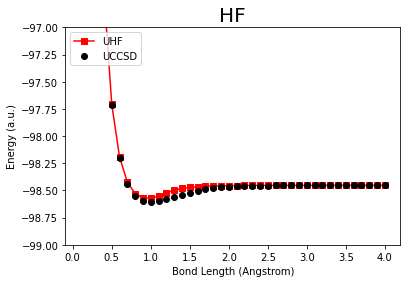

In [6]:
# plot UHF UCCSD
import matplotlib.pyplot as plt
plt.title("HF", fontsize=20)
plt.xlabel("Bond Length (Angstrom)")
plt.ylabel("Energy (a.u.)")
plt.plot(distance, energy_UHF, 'rs-',label = 'UHF')
plt.plot(distance, energy_UCCSD, 'ko',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-99, -97)
#plt.xlim(0.1, 3.9)
plt.show()

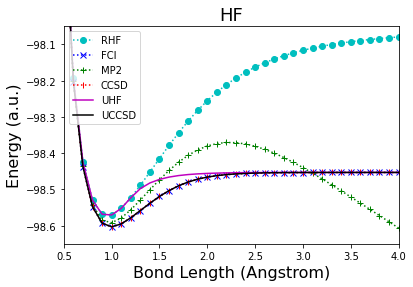

In [7]:
# print(energy_CCSD)
import matplotlib.pyplot as plt
plt.title("HF", fontsize=18)
plt.xlabel("Bond Length (Angstrom)", fontsize=16)
plt.ylabel("Energy (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF, 'co:', label = 'RHF')
plt.plot(distance, energy_FCI,'bx:', label = 'FCI')
plt.plot(distance, energy_MP2, 'g+:', label = 'MP2')
plt.plot(distance, energy_CCSD, 'r|:',label = 'CCSD')
plt.plot(distance, energy_UHF, 'm-', label = 'UHF')
plt.plot(distance, energy_UCCSD, 'k-',label = 'UCCSD')
plt.legend(loc = 2)
plt.ylim(-98.65, -98.05)
plt.xlim(0.5, 4.0)
plt.savefig('./HF_sto3g.tiff', dpi=300, bbox_inches='tight')
plt.show()

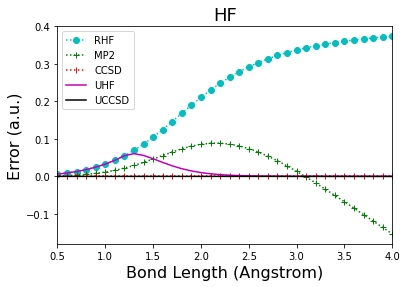

In [6]:
# print(energy_CCSD)
import matplotlib.pyplot as plt
plt.title("HF", fontsize=18)
plt.xlabel("Bond Length (Angstrom)", fontsize=16)
plt.ylabel("Error (a.u.)", fontsize=16)
plt.plot(distance, energy_RHF-energy_FCI, 'co:', label = 'RHF')
#plt.plot(distance, energy_FCI-energy_FCI,'bx:', label = 'FCI')
plt.plot(distance, energy_MP2-energy_FCI, 'g+:', label = 'MP2')
plt.plot(distance, energy_CCSD-energy_FCI, 'r|:',label = 'CCSD')
plt.plot(distance, energy_UHF-energy_FCI, 'm-', label = 'UHF')
plt.plot(distance, energy_UCCSD-energy_FCI, 'k-',label = 'UCCSD')
plt.legend(loc = 2)
#plt.ylim(-98.65, -98.05)
plt.xlim(0.5, 4.0)
plt.savefig('./HF_diff_sto3g.tiff', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
#with open('HF_sto3g.dat', 'w') as f:
    # Write comment
#    f.write('# {0:^15s} {1:^15s} {2:^15s} {3:^15} {4:^15} {5:^15} {6:^15}\n'.format('distance', 'energy_RHF', 'energy_FCI', 'energy_MP2', 'energy_CCSD', 'energy_UHF', 'energy_UCCSD'))
  
    # Write data
#    for distance,energy_RHF,energy_FCI,energy_MP2,energy_CCSD,energy_UHF,energy_UCCSD in zip(distance, energy_RHF, energy_FCI, energy_MP2, energy_CCSD, energy_UHF, energy_UCCSD):
#     f.write(' {0:1.56e} {1:1.56e} {2:1.56e} {3:1.56e} {4:1.56e} {5:1.56e} {6:1.56e}\n'.format(distance, energy_RHF, energy_FCI, energy_MP2, energy_CCSD, energy_UHF, energy_UCCSD))